In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('linear_data.csv')
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [4]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [5]:
df[['x']].head()

,x
0,0.00000
1,0.02004
2,0.04008
3,0.06012
4,0.08016


In [7]:
df['y'].tail()

495    25.356174
496    24.417804
497    25.625916
498    24.269704
499    24.732043
Name: y, dtype: float64

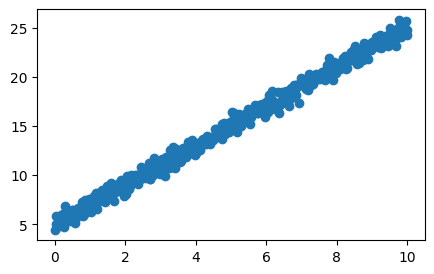

In [9]:
plt.figure(figsize=(5,3))
plt.scatter(df['x'], df['y'])

In [10]:
df2 = pd.read_csv('nonlinear_data.csv')

In [12]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [13]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


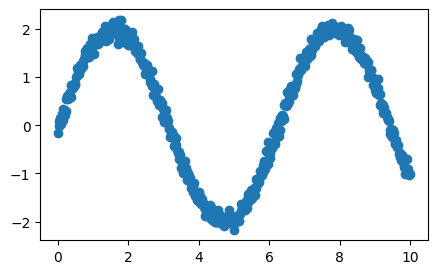

In [14]:
plt.figure(figsize=(5,3))
plt.scatter(df2['x'], df2['y'])

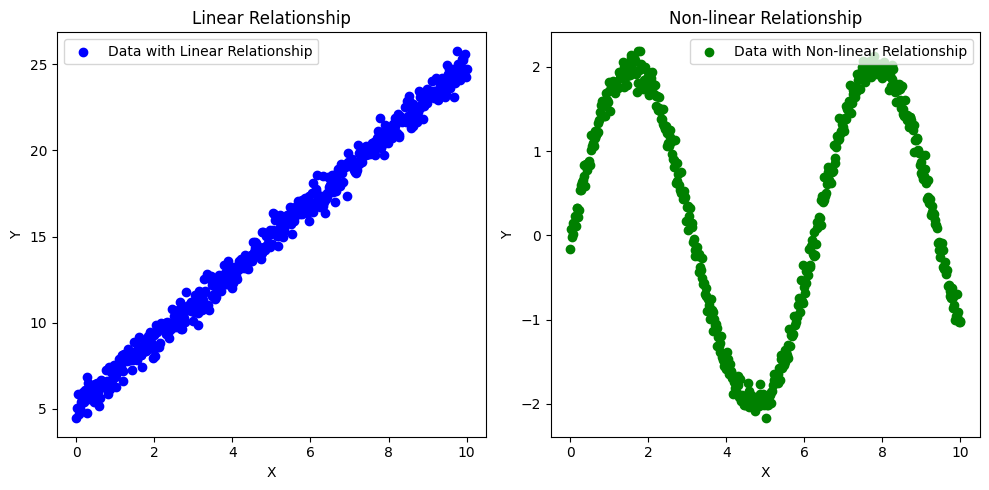

In [15]:
#linear
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.scatter(df.x, df.y, color='blue', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#non-linear
plt.subplot(1, 2, 2)
plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout() #adjusts the subplots to fit into the figure area properly
plt.show()

In [16]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [17]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [20]:
reg1 = LinearRegression()
reg1.fit(df[['x']], df['y'])

LinearRegression()

In [21]:
reg1.score(df[['x']], df[['y']])

0.9928923730526016

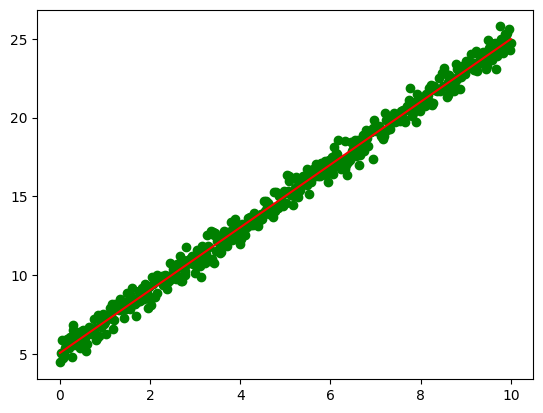

In [27]:
plt.scatter(df.x, df.y , color='green')
plt.plot(df.x, reg1.predict(df[['x']]), color='red')

# for non linear Data2

In [28]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [29]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [30]:
reg2 = LinearRegression()
reg2.fit(df2[['x']], df2.y)

LinearRegression()

In [35]:
reg2.score(df2[['x']], df2.y)

0.004321199719043656

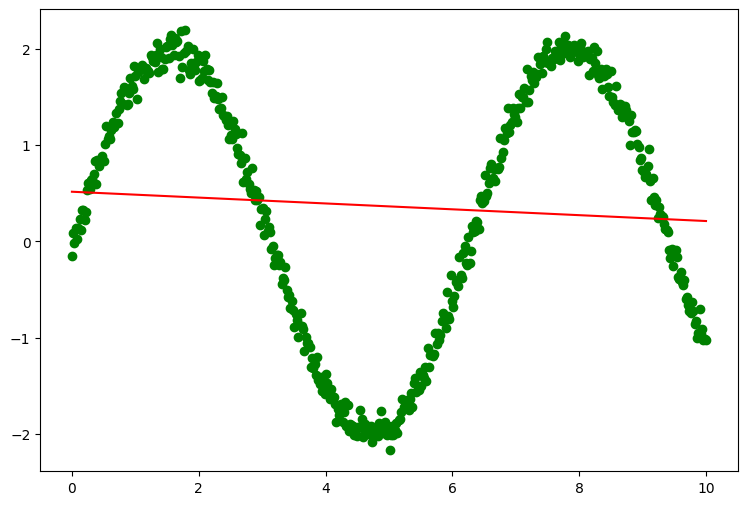

In [40]:
plt.figure(figsize=(9,6))


plt.scatter(df2.x, df2.y, color='green')
plt.plot(df2[['x']], reg2.predict(df2[['x']]), color='red')


In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
ploy = PolynomialFeatures(degree=6)

In [44]:
x_poly = ploy.fit_transform(df2[['x']])

In [46]:
x_poly.shape

(500, 7)

In [49]:
pd.DataFrame(x_poly).head()

,0,1,2,3,4,5,6
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07


In [51]:
df2.x.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [52]:
reg_poly = LinearRegression()

In [54]:
reg_poly.fit(x_poly, df2.y)

LinearRegression()

In [55]:
reg_poly.score(x_poly, df2.y)

0.9930624844497353

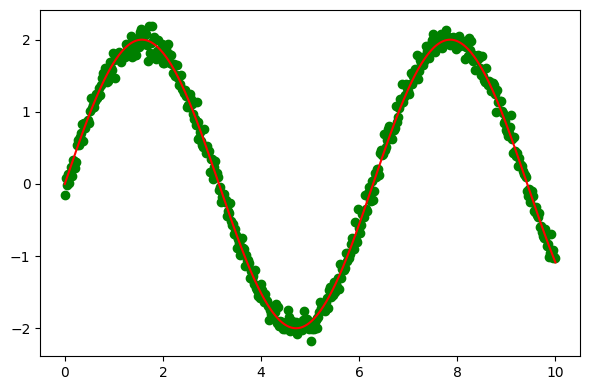

In [61]:
plt.figure(figsize=(6,4))

plt.scatter(df2.x, df2.y, color='green')
plt.plot(df.x, 2*np.sin(df.x), color = 'red')

plt.tight_layout()

# testing overfit and bestfit

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(x_poly, df2.y, test_size = 0.25, random_state= 42)

In [65]:
xtrain.shape

(375, 7)

In [68]:
reg_poly.fit(xtrain, ytrain)

LinearRegression()

In [69]:
reg_poly.score(xtrain, ytrain)

0.9931809889865081

In [70]:
reg_poly.score(xtest, ytest)

0.9924289090476344